In [26]:
!pip install missingno

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import missingno as msno
from scipy import stats
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn
import warnings
warnings.filterwarnings("ignore")

In [28]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df_copy = df.copy()

In [29]:
df_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [30]:
a,b = df_copy.shape
print("satır sayısı: ", a)
print("sütun sayısı: ", b)

satır sayısı:  34857
sütun sayısı:  21


In [31]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [32]:
df_copy.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [33]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    df_copy[colname] = df_copy[colname].astype('category')

In [34]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [35]:
num_cats = ['Postcode']  

for colname in num_cats:
    df_copy[colname] = df_copy[colname].astype('category')

In [36]:
df_copy = df_copy.drop(['Bedroom2'],1)

In [37]:
# Add age variable
df_copy['Age'] = 2023 - df_copy['YearBuilt']

# Identify historic homes
df_copy['Historic'] = np.where(df_copy['Age']>=50,'Historic','Contemporary')

# Convert to Category
df_copy['Historic'] = df_copy['Historic'].astype('category')

In [38]:
categorical_columns = ["Suburb", "Address", "Type", "Method", "SellerG", "Postcode", "CouncilArea", "Regionname", "Historic"]
for column in categorical_columns:
    df_copy[column] = df_copy[column].fillna(df_copy[column].mode().iloc[0])

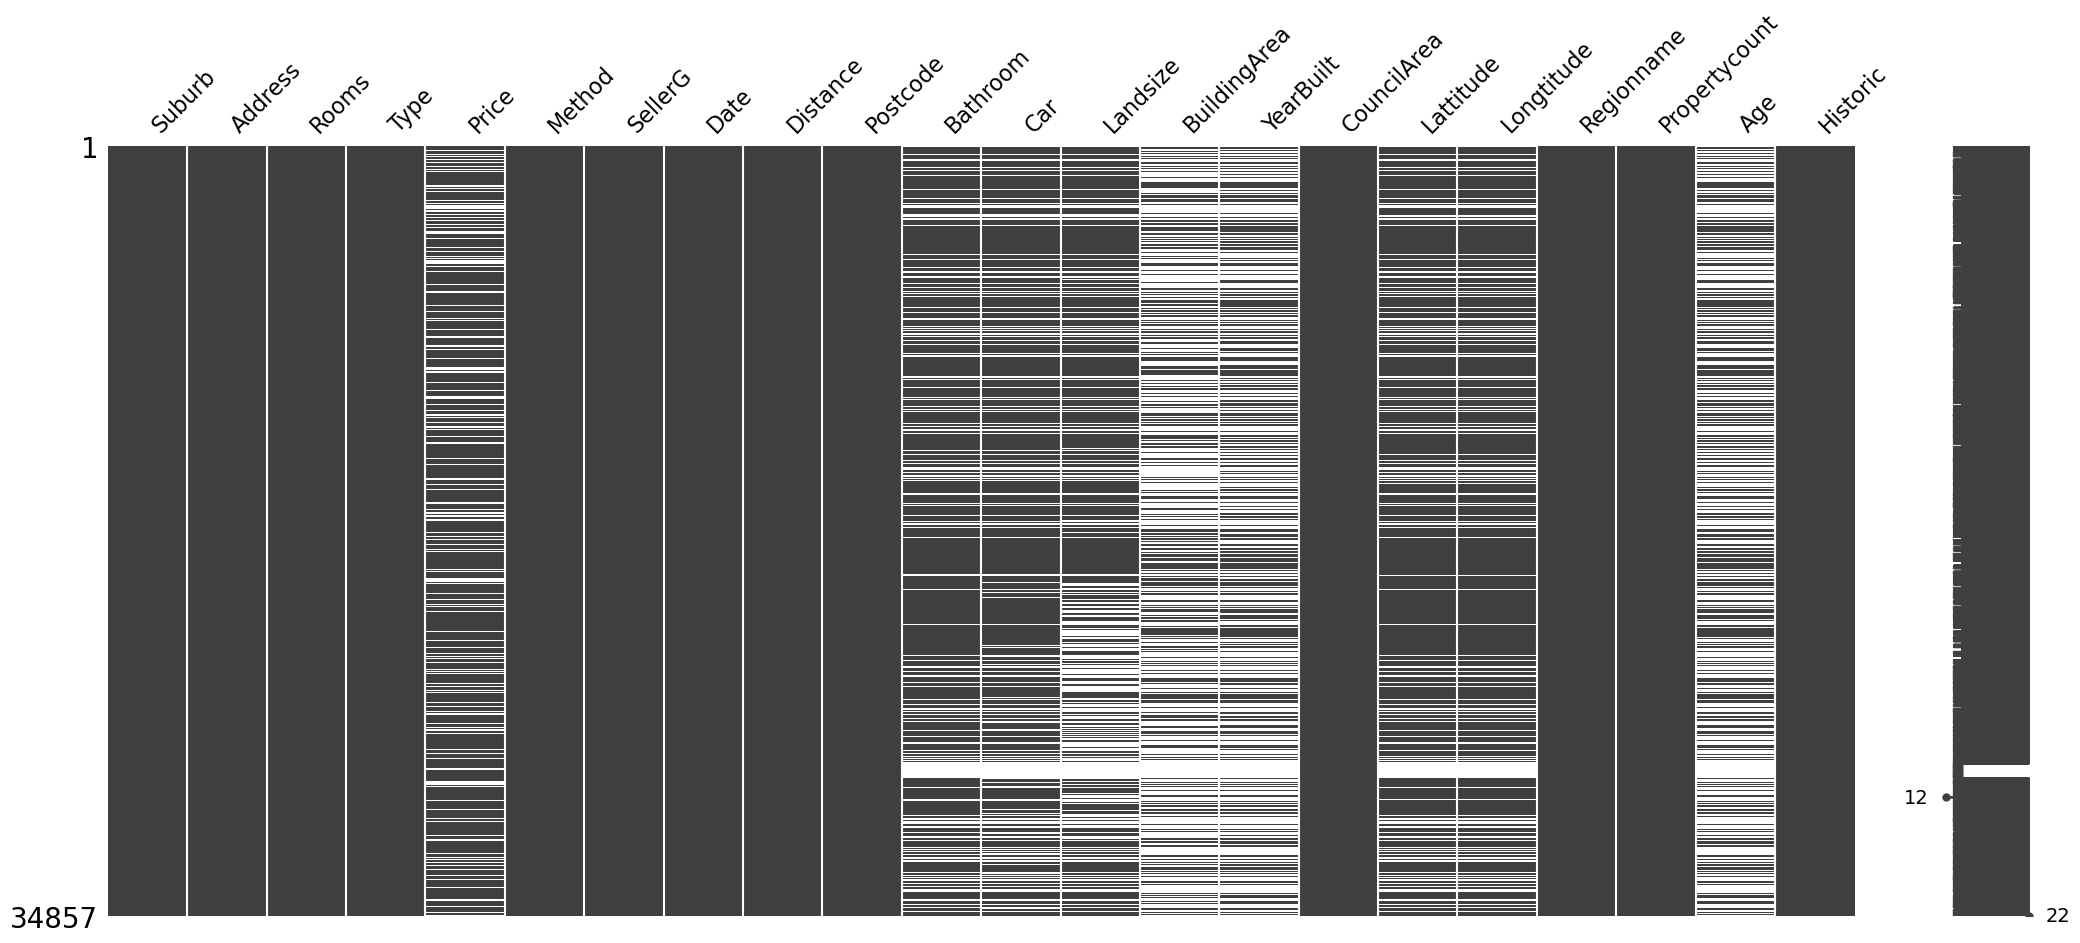

In [39]:
msno.matrix(df_copy)
plt.show()

In [40]:
df_copy = df_copy.dropna()

In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         8887 non-null   category      
 1   Address        8887 non-null   category      
 2   Rooms          8887 non-null   int64         
 3   Type           8887 non-null   category      
 4   Price          8887 non-null   float64       
 5   Method         8887 non-null   category      
 6   SellerG        8887 non-null   category      
 7   Date           8887 non-null   datetime64[ns]
 8   Distance       8887 non-null   float64       
 9   Postcode       8887 non-null   category      
 10  Bathroom       8887 non-null   float64       
 11  Car            8887 non-null   float64       
 12  Landsize       8887 non-null   float64       
 13  BuildingArea   8887 non-null   float64       
 14  YearBuilt      8887 non-null   float64       
 15  CouncilArea    8887 

In [42]:
data_float = ["Price", "Distance", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude", "Propertycount", "Age"]

In [43]:
data_int = ["Rooms"]

In [44]:
def outlier_cleaning(data, threshold=3):
    
    # Kategorik olmayan değerler seçildi
    numeric_columns = data.select_dtypes(include=[np.number])
    # Z-skorlarını hesaplayın
    z_scores = np.abs((numeric_columns - numeric_columns.mean()) / numeric_columns.std())
    # Aykırı olmayan verileri seçin ve yeni bir DataFrame oluşturun
    clean_data = data[(z_scores <= threshold).all(axis=1)]

    return clean_data

df = pd.DataFrame(df_copy)

# Aykırı olmayan veriyi elde edin
clean_df = outlier_cleaning(df)

# Aykırı olmayan veriyi görüntüleyin
print(clean_df)

           Suburb           Address  Rooms Type      Price Method  SellerG  \
2      Abbotsford   25 Bloomburg St      2    h  1035000.0      S   Biggin   
4      Abbotsford      5 Charles St      3    h  1465000.0     SP   Biggin   
6      Abbotsford       55a Park St      4    h  1600000.0     VB   Nelson   
11     Abbotsford      124 Yarra St      3    h  1876000.0      S   Nelson   
14     Abbotsford     98 Charles St      2    h  1636000.0      S   Nelson   
...           ...               ...    ...  ...        ...    ...      ...   
34847     Wollert   27 Birchmore Rd      3    h   500000.0     PI      Ray   
34849     Wollert   35 Kingscote Wy      3    h   570000.0     SP       RW   
34853  Yarraville     29A Murray St      2    h   888000.0     SP  Sweeney   
34854  Yarraville    147A Severn St      2    t   705000.0      S      Jas   
34856  Yarraville  3 Tarrengower St      2    h  1020000.0     PI       RW   

            Date  Distance Postcode  ...  Landsize  BuildingAre

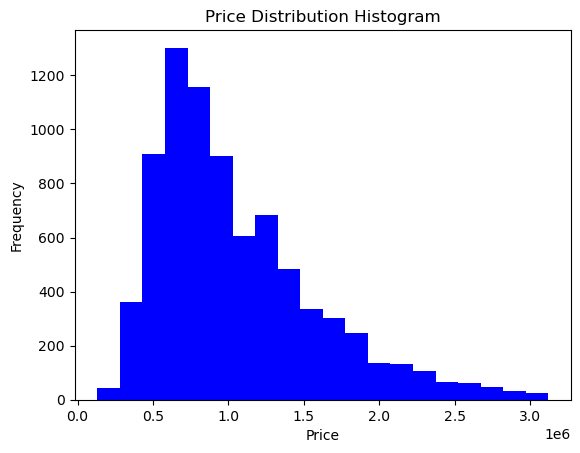

In [45]:
plt.hist(clean_df['Price'], bins=20, color='blue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
plt.show()

In [46]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7938 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         7938 non-null   category      
 1   Address        7938 non-null   category      
 2   Rooms          7938 non-null   int64         
 3   Type           7938 non-null   category      
 4   Price          7938 non-null   float64       
 5   Method         7938 non-null   category      
 6   SellerG        7938 non-null   category      
 7   Date           7938 non-null   datetime64[ns]
 8   Distance       7938 non-null   float64       
 9   Postcode       7938 non-null   category      
 10  Bathroom       7938 non-null   float64       
 11  Car            7938 non-null   float64       
 12  Landsize       7938 non-null   float64       
 13  BuildingArea   7938 non-null   float64       
 14  YearBuilt      7938 non-null   float64       
 15  CouncilArea    7938 

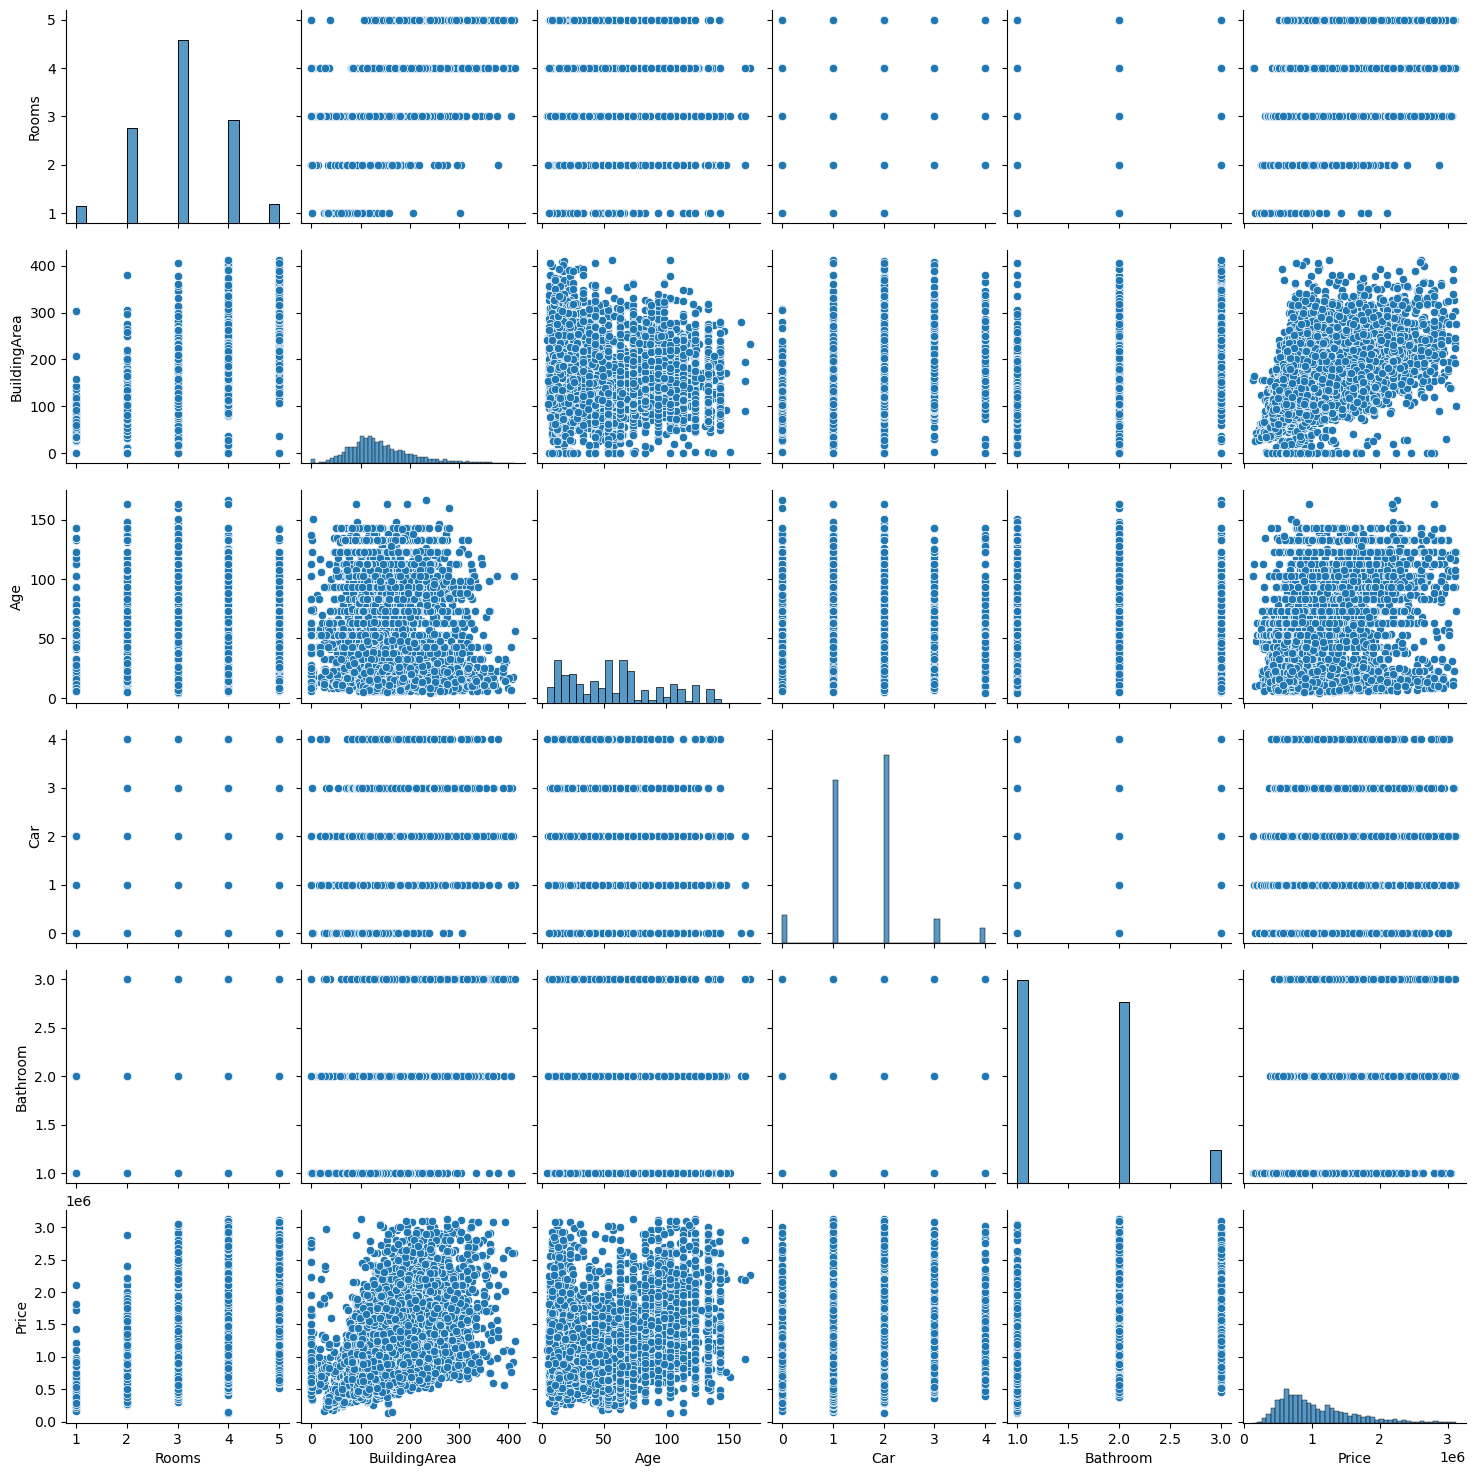

In [47]:
sns.pairplot(clean_df, vars=["Rooms", "BuildingArea", "Age", "Car", "Bathroom", "Price"], kind="scatter")
plt.show()

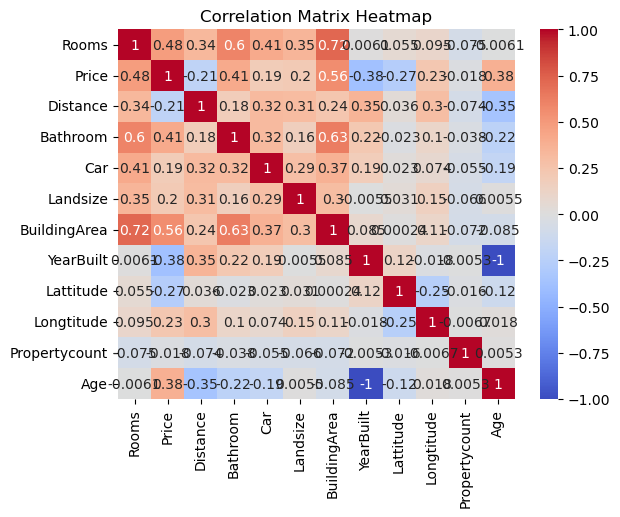

In [48]:
corr_matrix = clean_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [49]:
X = clean_df[["Rooms", "BuildingArea", "Bathroom", "Age"]]  # Replace 'feature1', 'feature2', ... with your actual features
y = clean_df['Price']  # Replace 'price' with your actual target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Print the evaluation results for each model
for model_name, metrics in results.items():
    print(f'{model_name} - MAE: {metrics["MAE"]}, MSE: {metrics["MSE"]}, RMSE: {metrics["RMSE"]}, R2: {metrics["R2"]}')

Lasso - MAE: 277580.619069724, MSE: 134792715256.29091, RMSE: 367141.27424778993, R2: 0.5197665731285543
LinearRegression - MAE: 277580.7930677578, MSE: 134792840189.77853, RMSE: 367141.44439136604, R2: 0.5197661280211405
Ridge - MAE: 277577.5669809906, MSE: 134789698434.81664, RMSE: 367137.16569535236, R2: 0.5197773213244944
ElasticNet - MAE: 277086.56495607476, MSE: 134953867910.34885, RMSE: 367360.6782310116, R2: 0.5191924256966214
KNeighborsRegressor - MAE: 272628.0442065491, MSE: 140720685278.42, RMSE: 375127.55867627217, R2: 0.4986466680008521
RandomForestRegressor - MAE: 268644.6526338284, MSE: 136540382402.8546, RMSE: 369513.71071024495, R2: 0.5135400631778563
GradientBoostingRegressor - MAE: 255263.2394843511, MSE: 120113144527.64919, RMSE: 346573.4330955695, R2: 0.5720662878617537
AdaBoostRegressor - MAE: 289977.56006722496, MSE: 139071475763.41116, RMSE: 372922.88179114345, R2: 0.5045223975275983
